## Task1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

print(boston.keys())
boston['feature_names'].shape

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


(13,)

In [3]:
boston['data'].shape

(506, 13)

In [4]:
boston_data = boston['data']
boston_data.shape

(506, 13)

In [5]:
target_cost = boston['target']
target_cost.shape

(506,)

In [6]:
X = pd.DataFrame(boston_data, columns=boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = pd.DataFrame(target_cost, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston['feature_names'])

In [13]:
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [14]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687


In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [17]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne[:10]

array([[ 28.13809  ,  18.375324 ],
       [ -9.785578 ,  -4.5355387],
       [-15.695753 , -17.543627 ],
       [ 37.924854 ,  13.517046 ],
       [ -8.786393 ,   3.9951665],
       [-13.988173 ,  -7.7626657],
       [-11.960751 ,  -7.4771976],
       [-18.704308 , -23.812914 ],
       [ 38.665813 ,  12.55771  ],
       [ 35.53426  ,  11.327715 ]], dtype=float32)

In [18]:
X_train_tsne.shape

(404, 2)

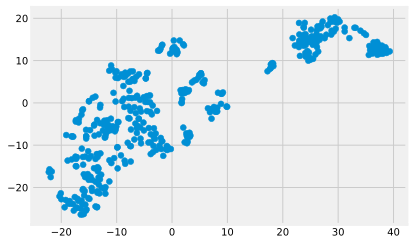

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

## Task2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [20]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [22]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [23]:
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

In [24]:
labels_test = kmeans.predict(X_test_scaled)

Text(10, 15, 'Кластер 2')

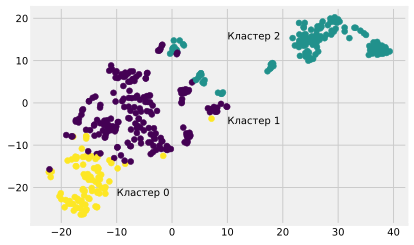

In [25]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-10, -22, 'Кластер 0')
plt.text(10, -5, 'Кластер 1')
plt.text(10, 15, 'Кластер 2')

In [26]:
y_train.mean()

price    22.796535
dtype: float64

In [27]:
y_train[labels_train==0].mean()

price    24.958115
dtype: float64

In [28]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [29]:
y_train[labels_train==2].mean()

price    27.788372
dtype: float64

In [30]:
X_train.CRIM.mean()

3.609124628712873

In [31]:
X_train.CRIM[labels_train==0].mean()

0.42166020942408367

In [32]:
X_train.CRIM[labels_train==1].mean()

10.797028425196853

In [33]:
X_train.CRIM[labels_train==2].mean()

0.07356558139534886

(0.0, 6.0)

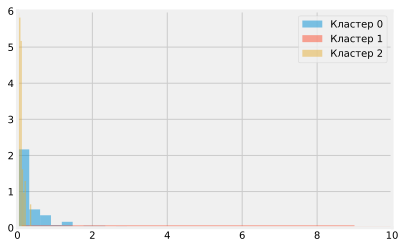

In [34]:
plt.hist(X_train.CRIM[labels_train==0], bins=10, density=True, alpha=0.5)
plt.hist(X_train.CRIM[labels_train==1], bins=10, density=True, alpha=0.5)
plt.hist(X_train.CRIM[labels_train==2], bins=10, density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlim(0, 10)
plt.ylim(0, 6)

## Task3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [ ]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [ ]:
pd.value_counts(labels_test)

In [ ]:
labels_test = kmeans.predict(X_test_scaled)

In [40]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne[:10]

array([[-0.08466545, -9.094789  ],
       [-4.065625  , -4.9136796 ],
       [ 4.3509474 , -5.121939  ],
       [-3.6825519 , -8.598453  ],
       [ 6.0234528 , -3.112944  ],
       [-1.0800035 , -7.6909995 ],
       [ 0.10878908, -6.971101  ],
       [ 3.5154343 , -5.583314  ],
       [ 5.1343093 , -3.0860076 ],
       [ 0.85057247, -7.2651095 ]], dtype=float32)

Text(2, -2, 'Кластер 2')

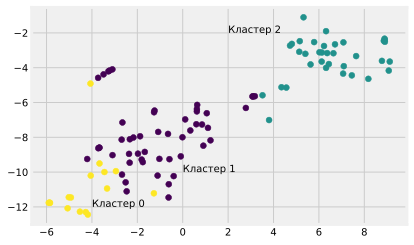

In [45]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.text(-4, -12, 'Кластер 0')
plt.text(0, -10, 'Кластер 1')
plt.text(2, -2, 'Кластер 2')


In [46]:
y_test.mean()

price    21.488235
dtype: float64

In [48]:
y_test[labels_test==0].mean()

price    21.860784
dtype: float64

In [49]:
y_test[labels_test==1].mean()

price    16.437143
dtype: float64

In [50]:
y_test[labels_test==2].mean()

price    31.35
dtype: float64

In [51]:
X_test.CRIM.mean()

3.630946764705883

In [52]:
X_test.CRIM[labels_test==0].mean()

0.26607882352941176

In [53]:
X_test.CRIM[labels_test==1].mean()

10.165531142857143

In [54]:
X_test.CRIM[labels_test==2].mean()

0.062060000000000004